# Figure 05: Intensity-based Events

## Combined Picture

In [ ]:
# sed -i 's/U-NET/U-Net/g' TABLE_EVALMETRICS_BINARY_METRICS_*.csv

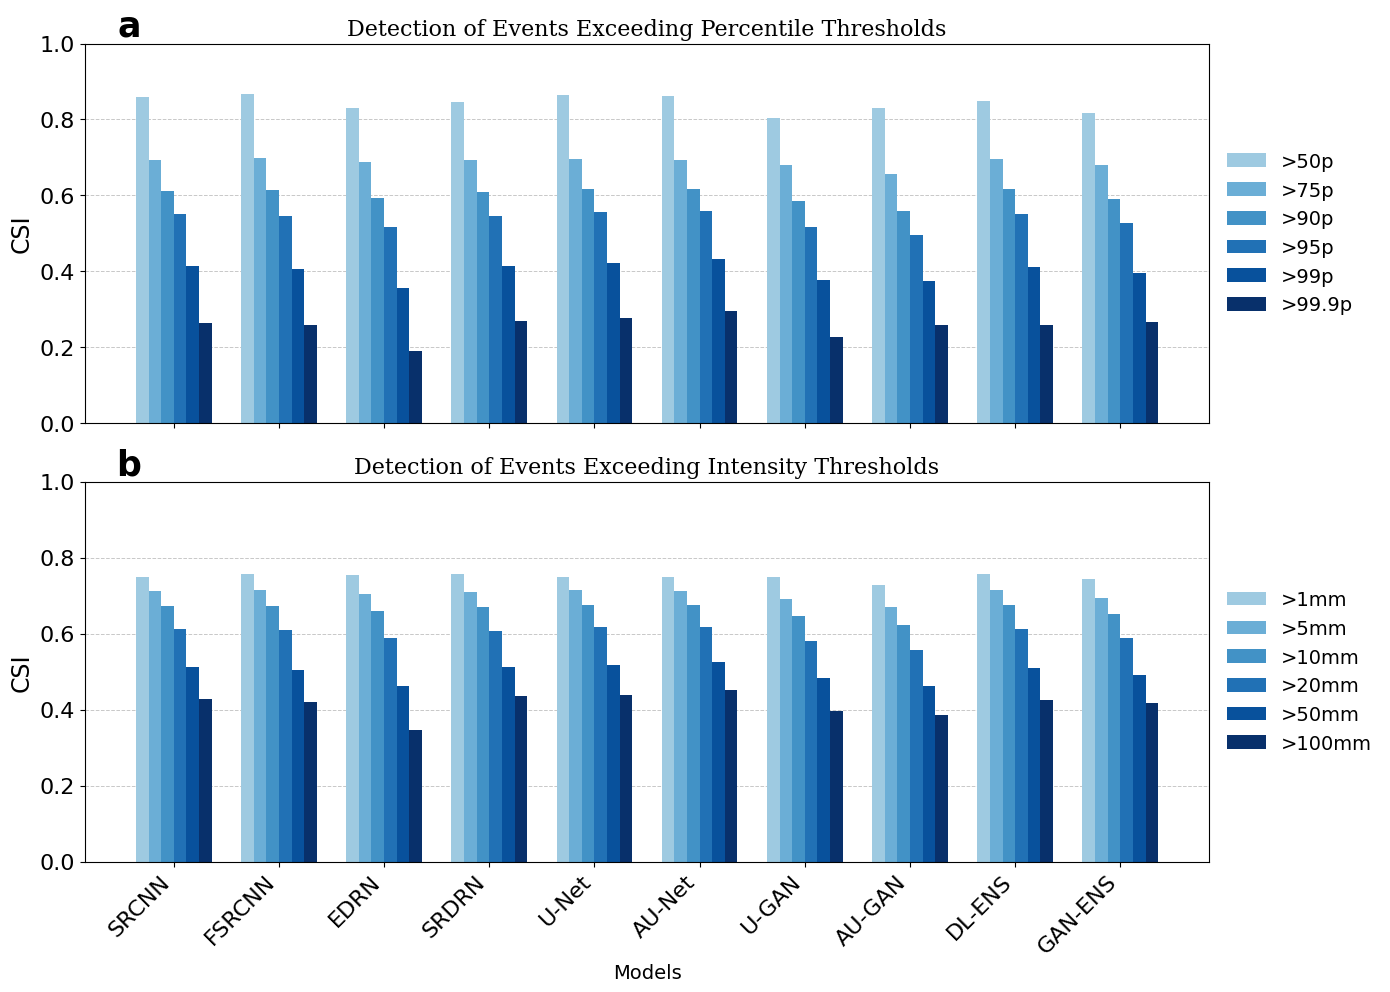

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------
# Configuration
# ----------------------------------------

DATA_PATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM05_EventDetection_SkillScores"
zone_filter = "SEA MASK"
metric = 'CSI'
metric_name = None  # override y-axis label if desired

# Intensity threshold CSV filenames
intensity_files = [
    "TABLE_EVALMETRICS_BINARY_METRICS_I001MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I005MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I010MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I020MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I050MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I100MM.C01.2001-23.e01.csv"
]
intensity_labels = ['>1mm', '>5mm', '>10mm', '>20mm', '>50mm', '>100mm']

# Percentile threshold CSV filenames
percentile_files = [
    "TABLE_EVALMETRICS_BINARY_METRICS_A050P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A075P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A090P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A095P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A099P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A999P.C01.2001-23.e01.csv"
]
percentile_labels = ['>50p', '>75p', '>90p', '>95p', '>99p', '>99.9p']

# Color palette for up to 6 bars per subplot
colors = ['#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
width = 0.12  # bar width
# ----------------------------------------

def load_filtered_metrics(file_list):
    """
    Load each CSV in file_list from DATA_PATH, filter by zone_filter,
    and return:
      - models:  array of EXP_ID values (from the first CSV)
      - metric_vals: list of arrays, each containing the 'metric' column
                     corresponding to that threshold.
    """
    dfs = [pd.read_csv(f"{DATA_PATH}/{fname}") for fname in file_list]
    # Filter each DataFrame to rows where ZONE_NAME == zone_filter
    dfs_filtered = [df[df["ZONE_NAME"] == zone_filter] for df in dfs]
    # Extract the metric column values (in the same order as file_list)
    metric_vals = [df[metric].values for df in dfs_filtered]
    # Assume all CSVs share the same EXP_ID ordering, so pull from the first filtered DF
    models = dfs_filtered[0]['EXP_ID'].values
    return models, metric_vals

# ----------------------------------------
# Load metrics
# ----------------------------------------

# Intensity thresholds
models, intensity_metrics = load_filtered_metrics(intensity_files)
# Percentile thresholds
_, percentile_metrics = load_filtered_metrics(percentile_files)

# ----------------------------------------
# Remove only the entry exactly named 'ENS'
# (but keep 'DL-ENS' and 'GAN-ENS')
# ----------------------------------------

mask = (models != 'ENS')

filtered_models     = models[mask]
filtered_intensity  = [arr[mask] for arr in intensity_metrics]
filtered_percentile = [arr[mask] for arr in percentile_metrics]

# Use these filtered model names for x-axis labels
model_names = filtered_models
x = np.arange(len(model_names))

# ----------------------------------------
# Create subplots
# ----------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# ------ Plot 1: Percentile thresholds ------

axes[0].set_title("Detection of Events Exceeding Percentile Thresholds", fontfamily='serif', fontsize=16)
axes[0].yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7, zorder=0)

for i in range(len(percentile_labels)):  # should be 6
    axes[0].bar(
        x - 2.5 * width + i * width,
        filtered_percentile[i],
        width,
        label=percentile_labels[i],
        color=colors[i],
        zorder=2
    )

axes[0].set_ylabel(metric if metric_name is None else metric_name, fontsize=17)
axes[0].tick_params(axis='y', labelsize=16)
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, frameon=False)
axes[0].set_ylim(0, 1)
axes[0].text(
    0.05, 1.09, 'a',
    transform=axes[0].transAxes,
    fontsize=25, fontweight='bold',
    va='top', ha='right'
)

# ------ Plot 2: Intensity thresholds ------

axes[1].set_title("Detection of Events Exceeding Intensity Thresholds", fontfamily='serif', fontsize=16)
axes[1].yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7, zorder=0)

for i in range(len(intensity_labels)):  # should also be 6
    axes[1].bar(
        x - 2.5 * width + i * width,
        filtered_intensity[i],
        width,
        label=intensity_labels[i],
        color=colors[i],
        zorder=2
    )

axes[1].set_xlabel('Models', fontsize=14)
axes[1].set_ylabel(metric if metric_name is None else metric_name, fontsize=17)
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, fontsize=16, rotation=45, ha='right')
axes[1].tick_params(axis='y', labelsize=16)
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, frameon=False)
axes[1].set_ylim(0, 1)
axes[1].text(
    0.05, 1.09, 'b',
    transform=axes[1].transAxes,
    fontsize=25, fontweight='bold',
    va='top', ha='right'
)

plt.tight_layout()

# ----------------------------------------
# Show or save the figure
# ----------------------------------------

# To save as a high-resolution JPEG, uncomment:
save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure05.jpg', format='jpg', dpi=500, bbox_inches='tight')

plt.show()


## Another Perspective

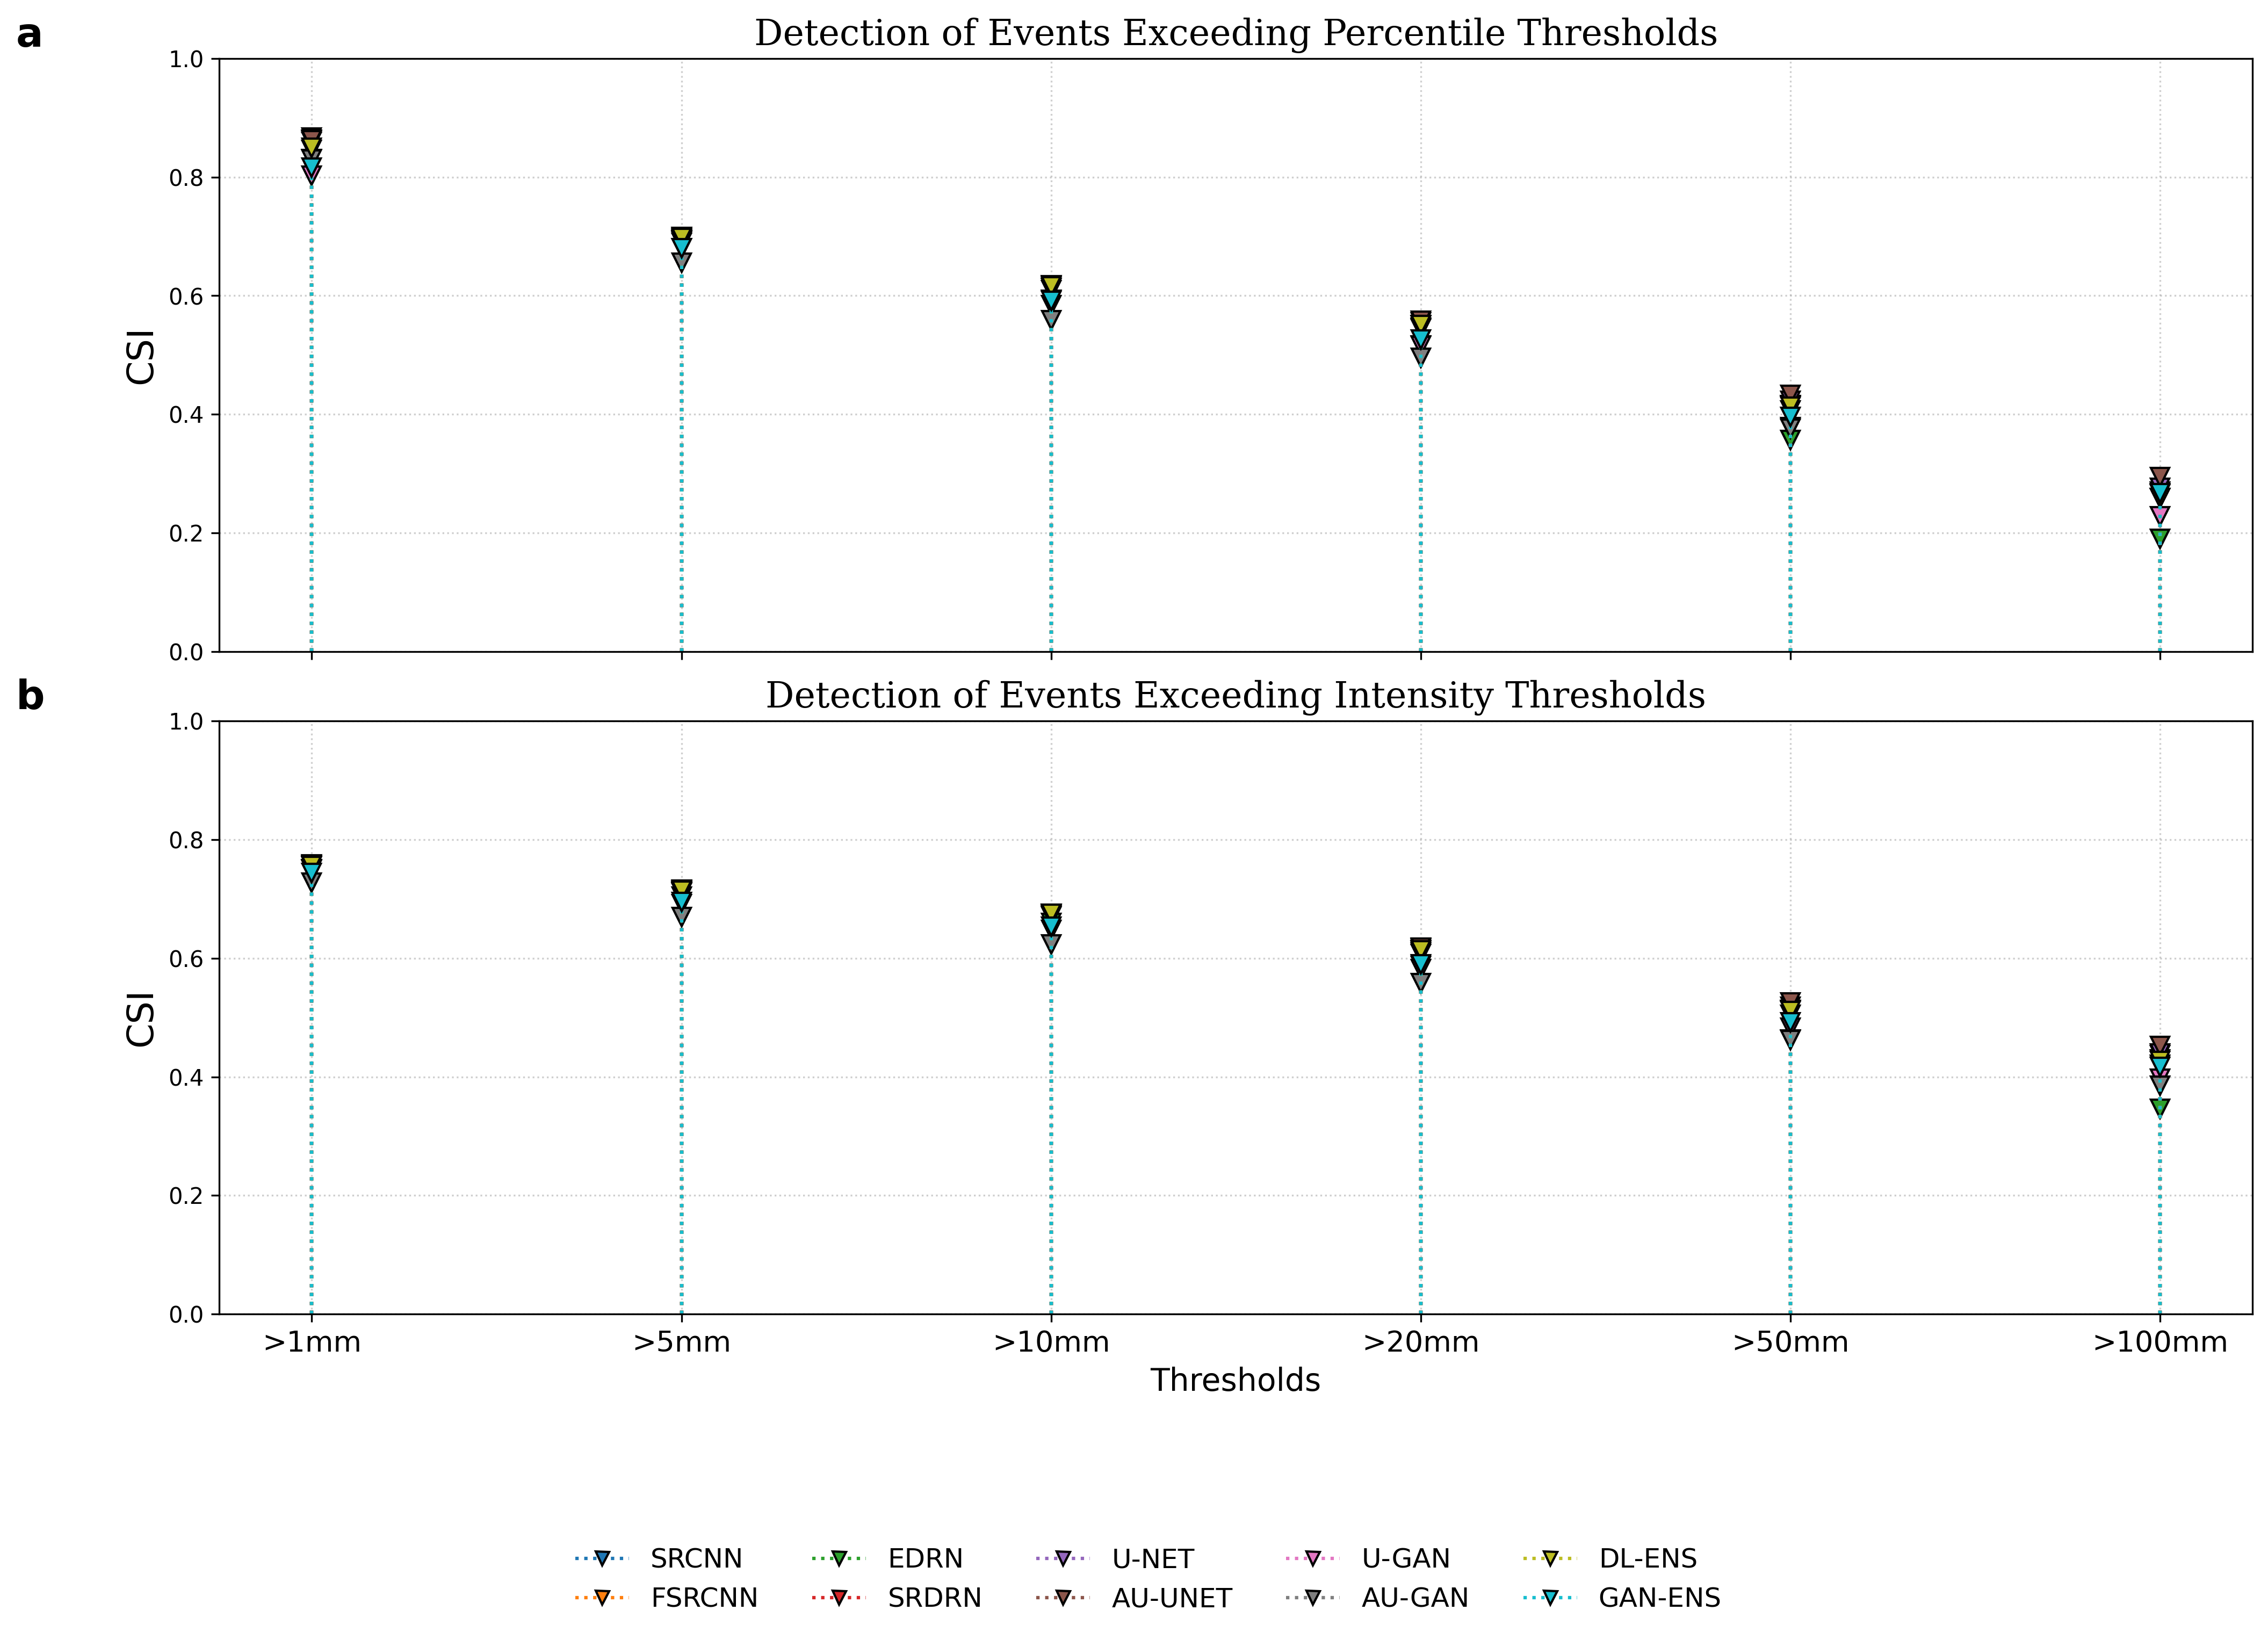

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # ----------------------------------------
# # Configuration
# # ----------------------------------------

# DATA_PATH = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM05_EventDetection_SkillScores"
# zone_filter = "SEA MASK"
# metric = 'CSI'
# metric_name = "CSI"

# # Intensity and percentile labels
# intensity_files = [
#     "TABLE_EVALMETRICS_BINARY_METRICS_I001MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I005MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I010MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I020MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I050MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I100MM.C01.2001-23.e01.csv"
# ]
# intensity_labels = ['>1mm', '>5mm', '>10mm', '>20mm', '>50mm', '>100mm']

# percentile_files = [
#     "TABLE_EVALMETRICS_BINARY_METRICS_A050P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A075P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A090P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A095P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A099P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A999P.C01.2001-23.e01.csv"
# ]
# percentile_labels = ['>50p', '>75p', '>90p', '>95p', '>99p', '>99.9p']

# # Load and filter
# def load_filtered_metrics(file_list):
#     dfs = [pd.read_csv(f"{DATA_PATH}/{fname}") for fname in file_list]
#     dfs_filtered = [df[df["ZONE_NAME"] == zone_filter] for df in dfs]
#     metric_vals = [df[metric].values for df in dfs_filtered]
#     models = dfs_filtered[0]['EXP_ID'].values
#     return models, metric_vals

# models, intensity_metrics = load_filtered_metrics(intensity_files)
# _, percentile_metrics = load_filtered_metrics(percentile_files)

# # Remove 'ENS'
# mask = (models != 'ENS')
# filtered_models = models[mask]
# filtered_intensity = [arr[mask] for arr in intensity_metrics]
# filtered_percentile = [arr[mask] for arr in percentile_metrics]
# n_models = len(filtered_models)
# x = np.arange(len(intensity_labels))

# # Colors and markers
# tab10_colors = plt.get_cmap('tab10').colors

# # Set up figure
# fig, axes = plt.subplots(2, 1, figsize=(14, 10), dpi=300, sharex=True)

# # --- Percentile subplot ---
# percentile_by_model = np.array(filtered_percentile).T
# axes[0].set_title("Detection of Events Exceeding Percentile Thresholds", fontfamily='serif', fontsize=16)

# for i in range(n_models):
#     markerline, stemlines, baseline = axes[0].stem(
#         x,
#         percentile_by_model[i],
#         linefmt=':', markerfmt='v', basefmt=" ",
#         label=filtered_models[i]
#     )
#     plt.setp(markerline, color=tab10_colors[i], markersize=8, markeredgecolor='black', markerfacecolor=tab10_colors[i])
#     plt.setp(stemlines, color=tab10_colors[i], linewidth=1.5)

# axes[0].set_ylabel(metric_name, fontsize=16)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(percentile_labels, fontsize=13)
# axes[0].set_ylim(0, 1)
# axes[0].grid(True, linestyle=':', alpha=0.6)
# axes[0].text(-0.1, 1.02, 'a', transform=axes[0].transAxes, fontsize=18, fontweight='bold')

# # --- Intensity subplot ---
# intensity_by_model = np.array(filtered_intensity).T
# axes[1].set_title("Detection of Events Exceeding Intensity Thresholds", fontfamily='serif', fontsize=16)

# for i in range(n_models):
#     markerline, stemlines, baseline = axes[1].stem(
#         x,
#         intensity_by_model[i],
#         linefmt=':', markerfmt='v', basefmt=" ",
#     )
#     plt.setp(markerline, color=tab10_colors[i], markersize=8, markeredgecolor='black', markerfacecolor=tab10_colors[i])
#     plt.setp(stemlines, color=tab10_colors[i], linewidth=1.5)

# axes[1].set_ylabel(metric_name, fontsize=16)
# axes[1].set_xlabel("Thresholds", fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(intensity_labels, fontsize=13)
# axes[1].set_ylim(0, 1)
# axes[1].grid(True, linestyle=':', alpha=0.6)
# axes[1].text(-0.1, 1.02, 'b', transform=axes[1].transAxes, fontsize=18, fontweight='bold')

# # --- Legend ---
# handles = [
#     plt.Line2D([0], [0], marker='v', linestyle=':', color=tab10_colors[i],
#                markerfacecolor=tab10_colors[i], markeredgecolor='black', label=filtered_models[i])
#     for i in range(n_models)
# ]
# fig.legend(handles=handles, loc='lower center', ncol=5, fontsize=12, frameon=False, bbox_to_anchor=(0.5, -0.02))

# plt.tight_layout()
# plt.subplots_adjust(bottom=0.18)
# plt.show()


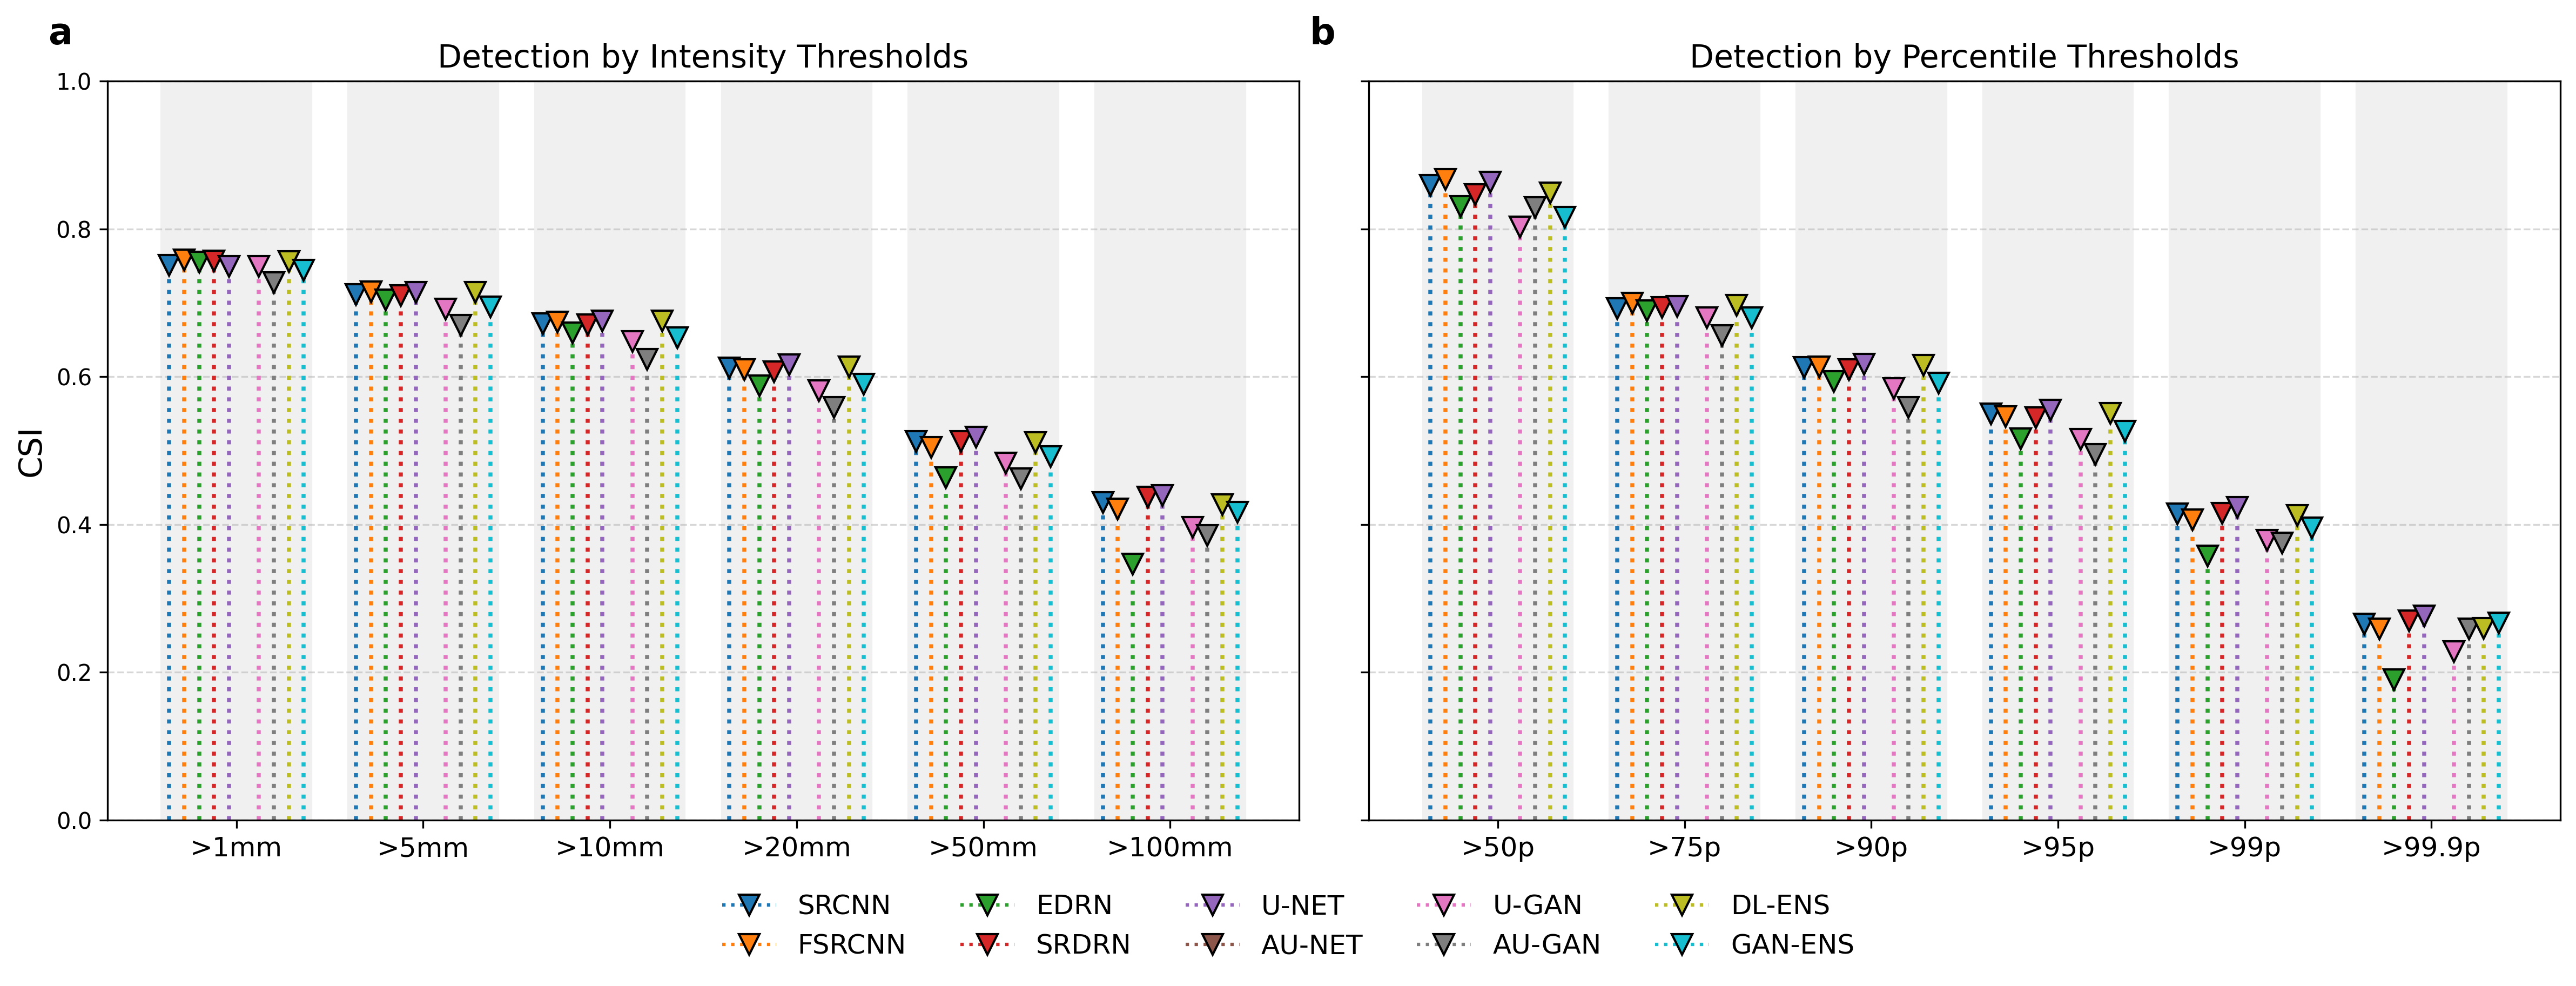

In [9]:
#!/usr/bin/env python
# ------------------------------------------------------------------
#  Clustered stem-plots for KGE skill over intensity & percentile
#  thresholds (SEA-MASK zone) – subplot a and b
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

# ----------------------------- USER INPUT --------------------------
DATA_PATH   = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM05_EventDetection_SkillScores"
zone_filter = "SEA MASK"
metric      = "CSI"                  # ←  metric to plot
metric_name = "CSI"

# File lists & x-tick labels
intensity_files = [
    "TABLE_EVALMETRICS_BINARY_METRICS_I001MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I005MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I010MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I020MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I050MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I100MM.C01.2001-23.e01.csv"
]
intensity_labels   = ['>1mm', '>5mm', '>10mm', '>20mm', '>50mm', '>100mm']

percentile_files   = [
    "TABLE_EVALMETRICS_BINARY_METRICS_A050P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A075P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A090P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A095P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A099P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A999P.C01.2001-23.e01.csv"
]
percentile_labels  = ['>50p', '>75p', '>90p', '>95p', '>99p', '>99.9p']

# Desired model order & colours (same palette as season figure)
all_models = [
    'SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-NET',
    'AU-NET', 'U-GAN', 'AU-GAN', 'DL-ENS', 'GAN-ENS'
]
colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
model_colors = dict(zip(all_models, colors))

# -------------------------- LOAD HELPERS ---------------------------
def load_filtered(file_list):
    """Return (models, list-of-1D-arrays) filtered by zone & metric."""
    dfs = [pd.read_csv(f"{DATA_PATH}/{f}") for f in file_list]
    dfs_f = [df[df["ZONE_NAME"] == zone_filter] for df in dfs]
    metric_vals = [df[metric].values for df in dfs_f]
    models      = dfs_f[0]["EXP_ID"].values
    return models, metric_vals

models_raw, intensity_vals_raw   = load_filtered(intensity_files)
_,           percentile_vals_raw = load_filtered(percentile_files)

# Drop any generic “ENS” row but keep DL-ENS / GAN-ENS etc.
valid_mask      = (models_raw != "ENS")
models_filtered = models_raw[valid_mask]

# Align data arrays to filtered mask
intensity_vals   = [arr[valid_mask] for arr in intensity_vals_raw]
percentile_vals  = [arr[valid_mask] for arr in percentile_vals_raw]

# Map model → row index in the (N_model × N_thresh) matrices
model_index = {m: np.where(models_filtered == m)[0][0] for m in models_filtered}

# Build (model × threshold) matrices for easy slicing
intensity_mat   = np.array(intensity_vals).T    # shape (N_model, 6)
percentile_mat  = np.array(percentile_vals).T

# ------------------------------ PLOT --------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True, dpi=300)
bar_width     = 0.8 / len(all_models)      # width allocated to each model
shade_color   = "#f0f0f0"
shade_alpha   = 1

for ax, data_mat, xlabels, tag in zip(
        axes,
        [intensity_mat, percentile_mat],
        [intensity_labels, percentile_labels],
        ["a", "b"]):

    x = np.arange(len(xlabels))
    cluster_w = len(all_models) * bar_width

    # light rectangle behind each threshold group
    for i in range(len(xlabels)):
        ax.axvspan(i - cluster_w / 2, i + cluster_w / 2,
                   color=shade_color, alpha=shade_alpha, zorder=0)

    # stem‐plots for each model, horizontally shifted within group
    for mpos, model in enumerate(all_models):
        if model not in model_index:                       # skip if absent
            continue
        row = model_index[model]
        y   = data_mat[row]

        x_shift = x - cluster_w / 2 + mpos * bar_width + bar_width / 2
        marker, stems, base = ax.stem(
            x_shift, y, linefmt=':', markerfmt='v', basefmt=' ')
        plt.setp(marker, markersize=9,
                 markerfacecolor=model_colors[model],
                 markeredgecolor='black', color=model_colors[model])
        plt.setp(stems, linewidth=1.8, color=model_colors[model])

    # cosmetics
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, fontsize=12)
    ax.set_ylim(0, 1)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.text(-0.05, 1.05, tag, transform=ax.transAxes,
            fontsize=16, fontweight='bold')

# Titles & labels
axes[0].set_title("Detection by Intensity Thresholds",  fontsize=14)
axes[1].set_title("Detection by Percentile Thresholds", fontsize=14)
axes[0].set_ylabel(metric_name, fontsize=14)

# Legend (centre-bottom)
handles = [Line2D([0], [0], marker='v', linestyle=':', color=model_colors[m],
                  markerfacecolor=model_colors[m], markeredgecolor='black',
                  markersize=9, label=m) for m in all_models]
fig.legend(handles, all_models, loc='lower center', ncol=5, fontsize=12,
           frameon=False, bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()


In [21]:
# #!/usr/bin/env python
# # ------------------------------------------------------------------
# #  Vertical clustered stem-plots (CSI) for intensity & percentile
# #  thresholds – SEA-MASK zone
# #  • cluster_pad  : margin inside each cluster
# #  • cluster_gap  : extra blank space between clusters
# # ------------------------------------------------------------------
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.lines import Line2D

# # ----------------------------- CONFIG -----------------------------
# DATA_PATH   = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM05_EventDetection_SkillScores"
# zone_filter = "SEA MASK"
# metric      = "CSI"          # <-- change back to KGE if needed
# metric_name = "CSI"

# intensity_files = [
#     "TABLE_EVALMETRICS_BINARY_METRICS_I001MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I005MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I010MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I020MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I050MM.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_I100MM.C01.2001-23.e01.csv"
# ]
# intensity_labels   = ['>1mm', '>5mm', '>10mm', '>20mm', '>50mm', '>100mm']

# percentile_files   = [
#     "TABLE_EVALMETRICS_BINARY_METRICS_A050P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A075P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A090P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A095P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A099P.C01.2001-23.e01.csv",
#     "TABLE_EVALMETRICS_BINARY_METRICS_A999P.C01.2001-23.e01.csv"
# ]
# percentile_labels  = ['>50p', '>75p', '>90p', '>95p', '>99p', '>99.9p']

# all_models = [
#     'SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-NET',
#     'AU-NET', 'U-GAN', 'AU-GAN', 'DL-ENS', 'GAN-ENS'
# ]
# palette = [
#     '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
# ]
# model_colors = dict(zip(all_models, palette))

# # ---------------------------- LOAD DATA ---------------------------
# def load_filtered(file_list):
#     dfs = [pd.read_csv(f"{DATA_PATH}/{f}") for f in file_list]
#     dfs = [d[d["ZONE_NAME"] == zone_filter] for d in dfs]
#     return dfs[0]["EXP_ID"].values, [d[metric].values for d in dfs]

# models_raw, intensity_raw   = load_filtered(intensity_files)
# _,           percentile_raw = load_filtered(percentile_files)

# mask            = (models_raw != "ENS")             # drop generic ENS
# models_filtered = models_raw[mask]
# intensity_vals  = [a[mask] for a in intensity_raw]
# percentile_vals = [a[mask] for a in percentile_raw]
# midx = {m: np.where(models_filtered == m)[0][0] for m in models_filtered}

# intensity_mat  = np.array(intensity_vals).T   # model × threshold
# percentile_mat = np.array(percentile_vals).T

# # --------------------------- PLOT SETUP ---------------------------
# cluster_pad = 0.06     # inner margin (left+right) inside a cluster
# cluster_gap = 0.15     # blank space *between* neighbouring clusters

# fig, axes = plt.subplots(2, 1, figsize=(12, 9), dpi=300, sharex=False)

# shade_col   = "#f0f0f0"
# shade_alpha = 1

# for ax, mat, labels, tag in zip(
#         axes,
#         [intensity_mat, percentile_mat],
#         [intensity_labels, percentile_labels],
#         ["a", "b"]):

#     # x-positions centred with extra spacing
#     x = np.arange(len(labels)) * (1.0 + cluster_gap)

#     # -------------------------------- shading ----------------------
#     cluster_w = 1.0 - 2*cluster_pad            # usable width (unit = 1)
#     for xc in x:
#         lft = xc - cluster_w/2
#         rgt = xc + cluster_w/2
#         ax.axvspan(lft, rgt, color=shade_col, alpha=shade_alpha, zorder=0)

#     # ------------------------ models present -----------------------
#     present_models = [m for m in all_models if m in midx]
#     n_present      = len(present_models)
#     bar_width      = cluster_w / n_present

#     # ---------------------- plot stems -----------------------------
#     for pos, model in enumerate(present_models):
#         y = mat[midx[model]]
#         x_shift = (x - cluster_w/2 + cluster_pad + (pos + 0.5) * bar_width)

#         mline, stems, _ = ax.stem(x_shift, y, linefmt=':', markerfmt='T',
#                                   basefmt=' ')
#         plt.setp(mline, markersize=9,
#                  markerfacecolor=model_colors[model],
#                  markeredgecolor='black', color=model_colors[model])
#         plt.setp(stems, linewidth=1.8, color=model_colors[model])

#     # cosmetics
#     ax.set_xticks(x)
#     ax.set_xticklabels(labels, fontsize=11)
#     ax.set_ylim(0, 1)
#     ax.set_ylabel(metric_name, fontsize=13)
#     ax.grid(axis='y', linestyle='--', alpha=0.5)
#     ax.text(x[0] - (1+cluster_gap)*0.3, 1.05, tag, transform=ax.transData,
#             fontsize=15, fontweight='bold')

# axes[0].set_title("Detection by Intensity Thresholds",  fontsize=14)
# axes[1].set_title("Detection by Percentile Thresholds", fontsize=14)

# # ---------------------------- LEGEND ------------------------------
# handles = [
#     Line2D([0], [0], marker='s', linestyle=':', color=model_colors[m],
#            markerfacecolor=model_colors[m], markeredgecolor='black',
#            markersize=9, label=m)
#     for m in present_models
# ]
# fig.legend(handles, present_models, loc='lower center',
#            ncol=5, fontsize=12, frameon=False,
#            bbox_to_anchor=(0.5, -0.03))

# plt.tight_layout(rect=[0, 0.08, 1, 1])
# plt.show()


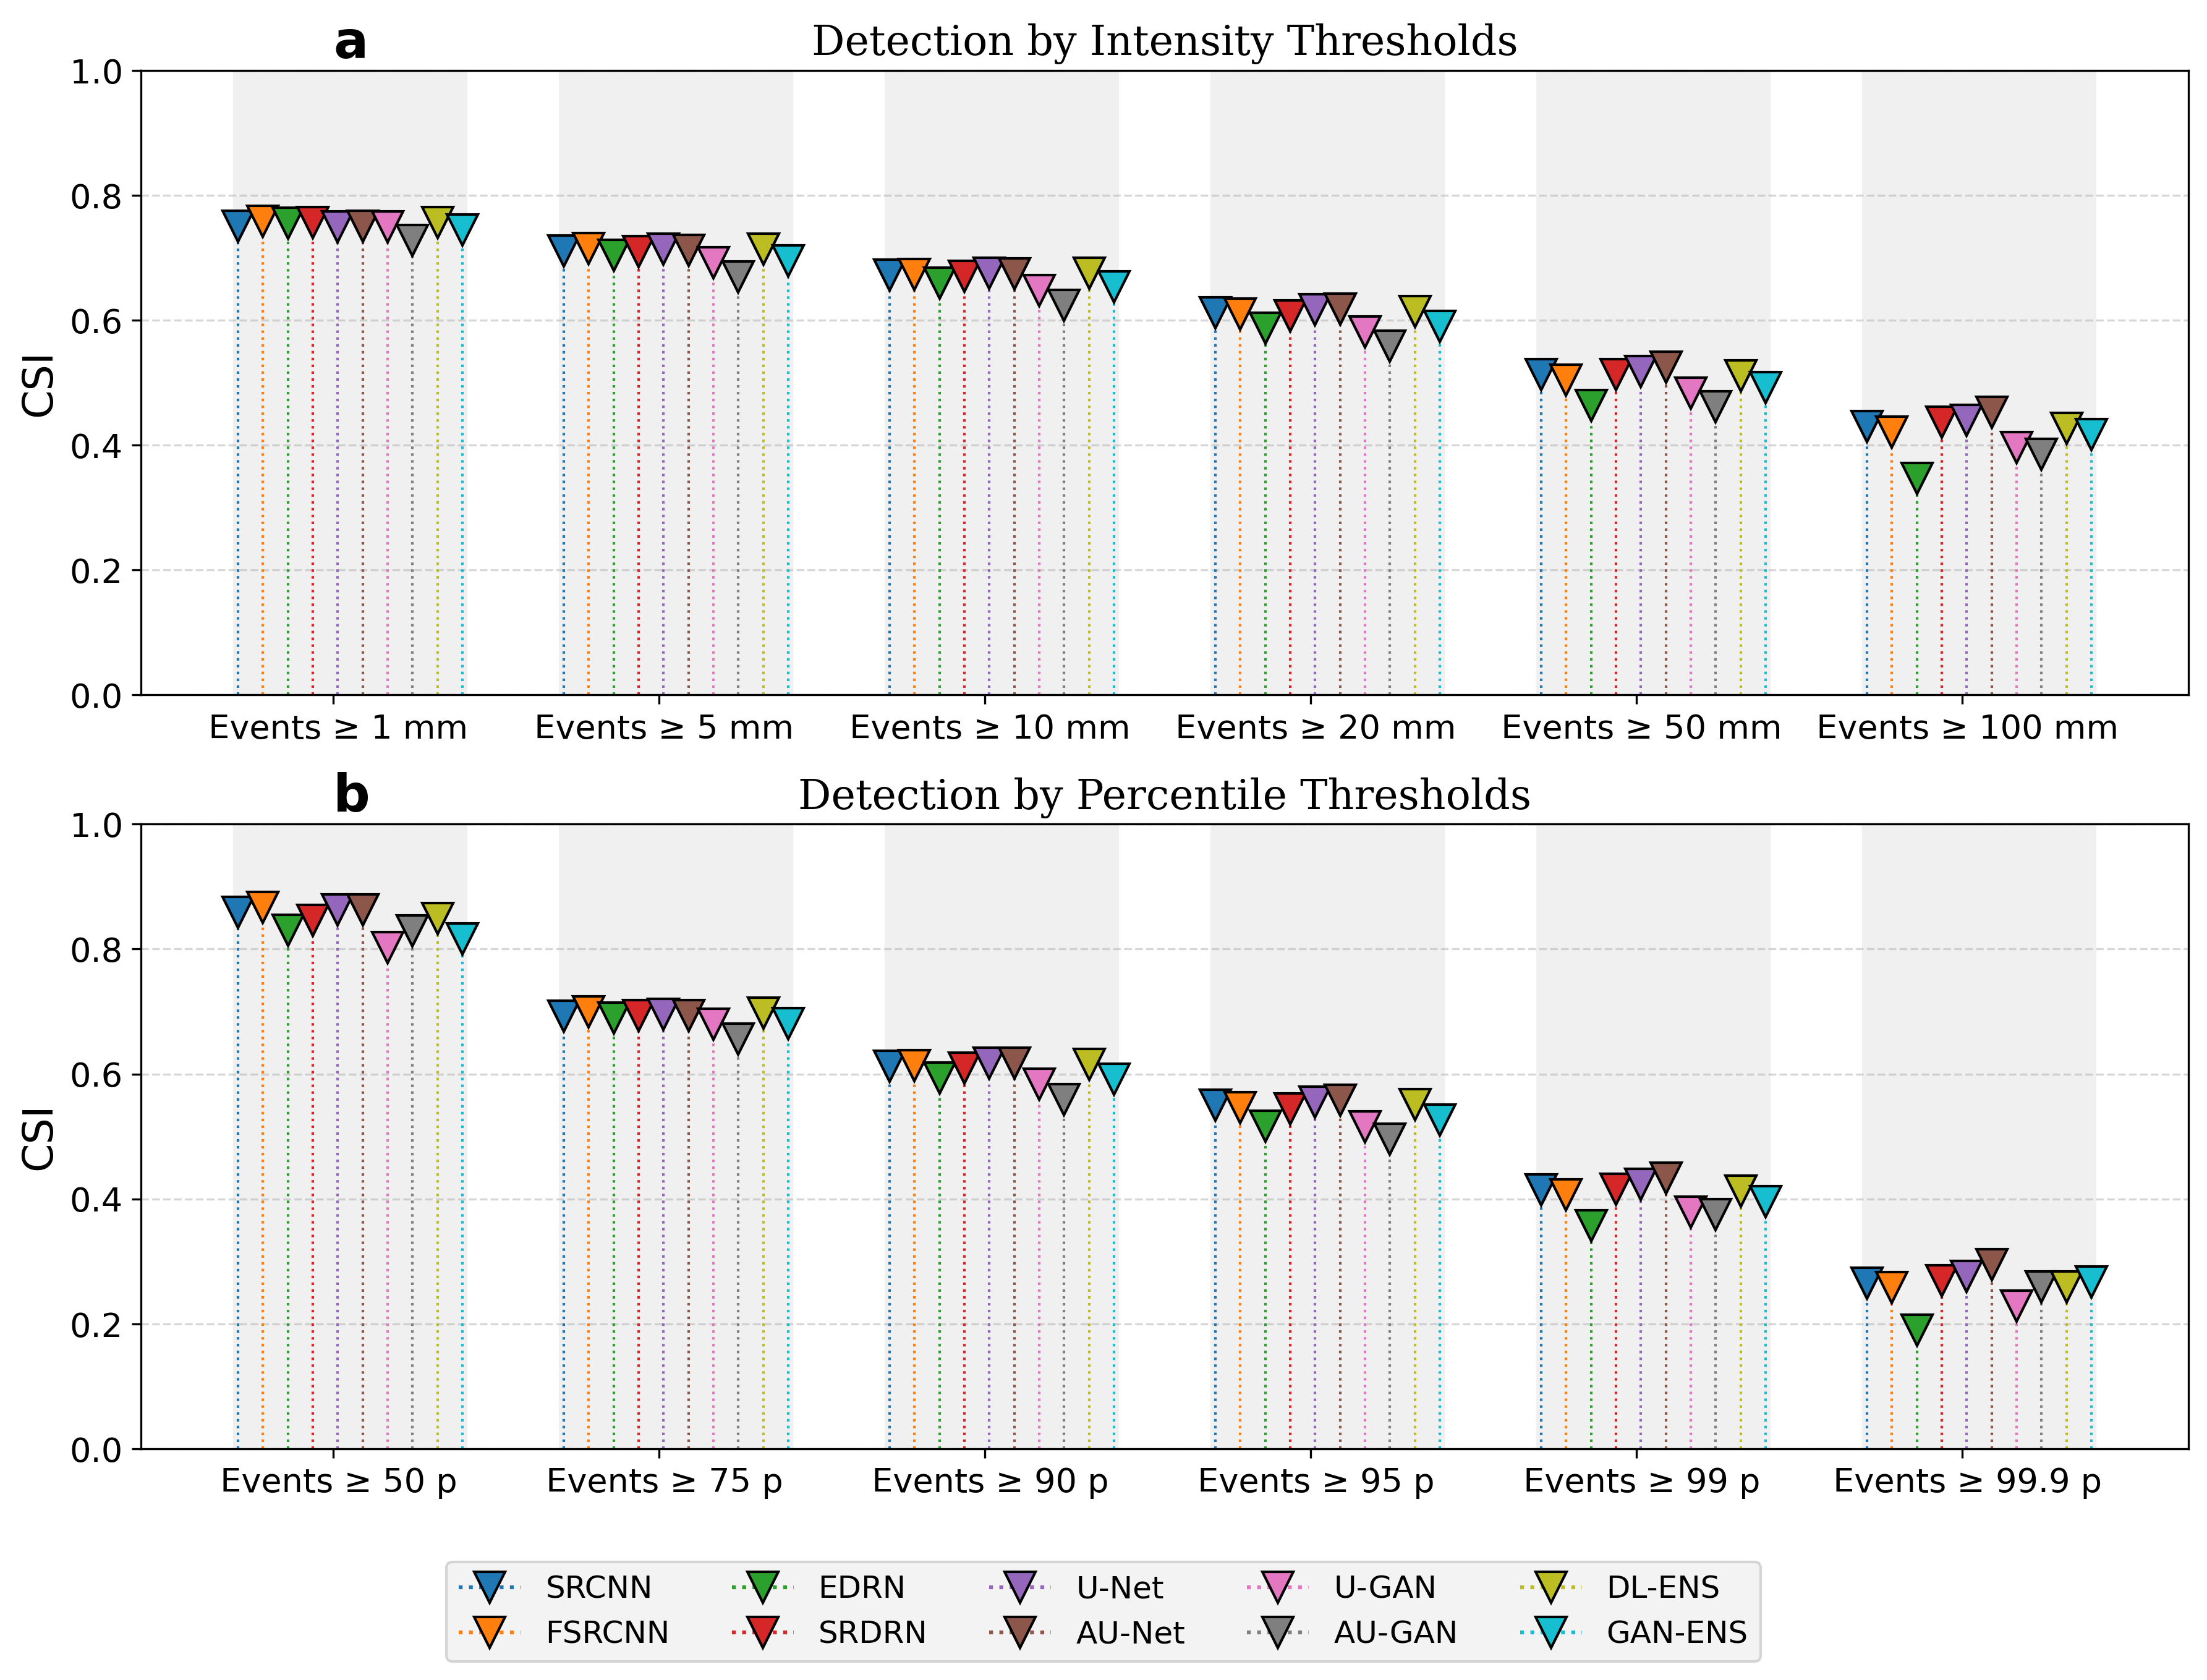

In [5]:
#!/usr/bin/env python
# ------------------------------------------------------------------
#  Vertical clustered stem-plots (CSI) – SEA MASK zone
#  * shade_extra pushes the right edge of the grey band outward
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# ----------------------------- CONFIG -----------------------------
DATA_PATH   = "/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/PLTDATA/FM05_EventDetection_SkillScores"
zone_filter = "SEA MASK"
metric      = "CSI"
metric_name = "CSI"

intensity_files = [
    "TABLE_EVALMETRICS_BINARY_METRICS_I001MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I005MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I010MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I020MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I050MM.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_I100MM.C01.2001-23.e01.csv"
]
intensity_labels = [
    ' Events ≥ 1 mm',
    ' Events ≥ 5 mm',
    ' Events ≥ 10 mm',
    ' Events ≥ 20 mm',
    ' Events ≥ 50 mm',
    ' Events ≥ 100 mm'
]

percentile_files = [
    "TABLE_EVALMETRICS_BINARY_METRICS_A050P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A075P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A090P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A095P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A099P.C01.2001-23.e01.csv",
    "TABLE_EVALMETRICS_BINARY_METRICS_A999P.C01.2001-23.e01.csv"
]
percentile_labels = [
    ' Events ≥ 50 p',
    ' Events ≥ 75 p',
    ' Events ≥ 90 p',
    ' Events ≥ 95 p',
    ' Events ≥ 99 p',
    ' Events ≥ 99.9 p'
]

all_models = [
    'SRCNN', 'FSRCNN', 'EDRN', 'SRDRN', 'U-Net',
    'AU-Net', 'U-GAN', 'AU-GAN', 'DL-ENS', 'GAN-ENS'
]
palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
model_colors = dict(zip(all_models, palette))

# -------------------------- LOAD DATA ----------------------------
def load_filtered(file_list):
    dfs = [pd.read_csv(f"{DATA_PATH}/{f}") for f in file_list]
    dfs = [d[d["ZONE_NAME"] == zone_filter] for d in dfs]
    return dfs[0]["EXP_ID"].values, [d[metric].values for d in dfs]

models_raw, intensity_raw   = load_filtered(intensity_files)
_,           percentile_raw = load_filtered(percentile_files)

mask            = (models_raw != "ENS")
models_filtered = models_raw[mask]
intensity_vals  = [a[mask] for a in intensity_raw]
percentile_vals = [a[mask] for a in percentile_raw]
midx = {m: np.where(models_filtered == m)[0][0] for m in models_filtered}

intensity_mat  = np.array(intensity_vals).T
percentile_mat = np.array(percentile_vals).T

# ------------------------- PLOT SETTINGS -------------------------
cluster_pad = 0.06    # inner white margin on each side
cluster_gap = 0.15    # gap between clusters
shade_extra = 0.06  # << increase or decrease to widen/narrow the band

fig, axes = plt.subplots(2, 1, figsize=(12, 9), dpi=300, sharex=False)

shade_col   = "#f0f0f0"
shade_alpha = 1

for ax, mat, labels, tag in zip(
        axes,
        [intensity_mat, percentile_mat],
        [intensity_labels, percentile_labels],
        ["a", "b"]):

    x_centres = np.arange(len(labels)) * (1.0 + cluster_gap)
    cluster_w = 1.0 - 2 * cluster_pad

    # ----------------------- Grey shading ------------------------
    for xc in x_centres:
        left  = xc - cluster_w/2 + cluster_pad/2 + shade_extra
        right = xc + cluster_w/2 - cluster_pad/2 + shade_extra
        ax.axvspan(left, right, color=shade_col,
                   alpha=shade_alpha, zorder=0)

    # present models only (avoid gaps)
    present_models = [m for m in all_models if m in midx]
    bar_width      = cluster_w / len(present_models)

    # ------------------------- Stems ----------------------------
    for pos, model in enumerate(present_models):
        y = mat[midx[model]]
        x_shift = (x_centres - cluster_w/2 + cluster_pad +
                   (pos + 0.5) * bar_width)

        mline, stems, _ = ax.stem(x_shift, y,
                                  linefmt=':', markerfmt='v', basefmt=' ')
        plt.setp(mline, markersize=12,
                 markerfacecolor=model_colors[model],
                 markeredgecolor='black', color=model_colors[model])
        plt.setp(stems, linewidth=1, color=model_colors[model])

    # cosmetics
    ax.set_xticks(x_centres)
    ax.set_xticklabels(labels, fontsize=14)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric_name, fontsize=16)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='both', labelsize=13)
    ax.text(0, 1.02, tag,
            transform=ax.transData, fontsize=20, fontweight='bold')

axes[0].set_title("Detection by Intensity Thresholds", fontfamily='serif', fontsize=16)
axes[1].set_title("Detection by Percentile Thresholds", fontfamily='serif', fontsize=16)

# --------------------------- LEGEND ------------------------------
handles = [
    Line2D([0], [0], marker='v', linestyle=':', color=model_colors[m],
           markerfacecolor=model_colors[m], markeredgecolor='black',
           markersize=12, label=m)
    for m in present_models
]

# fig.legend(legend_handles, all_models, loc='lower center', ncol=5, fontsize=18, prop=font_props, bbox_to_anchor=(0.5, -0.01), frameon=True, facecolor='#f0f0f0')

fig.legend(handles, present_models, loc='lower center',
           ncol=5, fontsize=12, frameon=True, facecolor='#f0f0f0',
           bbox_to_anchor=(0.5, -0.01))

plt.tight_layout(rect=[0, 0.08, 1, 1])

save_dir = '/home/midhunm/AI4KLIM/EXPMNTS/P02A_DeepDown_Generalization/ANALYSE/RESULTS'
# plt.savefig(f'{save_dir}/Figure05_ExtremeCSI.jpg', format = 'jpg', dpi=500, bbox_inches='tight',facecolor='w', edgecolor='w')
plt.show()